# Exercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


In [ ]:
# Imports
import kagglehub
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Ftrl, SGD
from tensorflow.keras.regularizers import l2, l1_l2, l1
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# 1. Load the data
path = kagglehub.dataset_download("uom190346a/water-quality-and-potability")
df = pd.read_csv(f"{path}/water_potability.csv")

Plot the Data Appropriately

In [ ]:
# 2. Handle missing values with (mean imputation)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
# 3. Split features and target
X = df_imputed.drop("Potability", axis=1)
y = df_imputed["Potability"]

In [ ]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=72)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Each Memeber Defines their model Here

In [ ]:
#Model Definition by member 1
def model_michael():
  model = Sequential([
      Dense(128, input_shape=(9,), activation='relu', kernel_regularizer=l1_l2(0.001)),
      Dropout(0.2),
      Dense(64, activation='relu', kernel_regularizer=l1_l2(0.001)),
      Dropout(0.2),
      Dense(1, activation='sigmoid', kernel_regularizer=l1_l2(0.001))
  ])

  model.compile(
      optimizer=Adam(learning_rate=0.002),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
  return model

# Start the training Process

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.677, Test: 0.686
[0.6187977194786072, 0.6483778357505798, 0.6650763154029846, 0.6665076613426208, 0.6765267252922058, 0.6750954389572144, 0.6736640930175781, 0.6655534505844116, 0.6612595319747925, 0.6688931584358215, 0.6679389476776123, 0.6741412281990051, 0.6812977194786072, 0.6731870174407959]


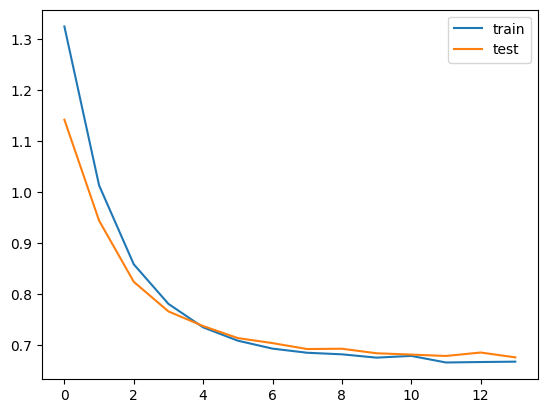

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.6860
F1 Score: 0.4213
Precision: 0.7500
Recall: 0.2930


In [ ]:
# Reuse this codeif necessary
#fit model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)


model = model_michael()
history = model.fit(
    X_train_scaled, y_train,
    epochs=4000,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=0
)
# evaluate the model
_, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
print(history.history['accuracy'])
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

y_pred_nn = model.predict(X_test_scaled)
y_pred_classes = (y_pred_nn > 0.5).astype(int)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
# summary viewer
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")